# Spam Message Detector

Spam message dectector is a binary classification supervised learning problem as the dataset to be used consists of categorical labels indicating if a mail is a spam or ham(not spam).

Binary classification problems can be solved with a couple of supervised learning models but we will be looking at these three models and evaluating them all to pick which one performs best of them. We are looking at:
- Logistic Regression
- Support Vector Machines(SVM)
- Naive Bayes

## Procedures

- Importing of Libraries and Dataset
- Data Assessing and Cleaning
- EDA
- Data Preprocessing
- Modelling
- Model Evaluation

## - Importing Libraries and Dataset

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Darasimi199\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Darasimi199\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Darasimi199\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Darasimi199\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
df = pd.read_csv('spam.csv', encoding="latin-1")

## - Data Assessing and Cleaning

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
# Drop the unnamed columns

df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Rename the columns to 'labels' and 'messages'

df.rename(columns={'v1':'labels', 'v2':'messages'}, inplace=True)

df.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# shape of dataset

df.shape

(5572, 2)

In [ ]:
# Encode the labels column using LabelEncoder

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
df['labels'] = encoder.fit_transform(df['labels'])

df.head()

,labels,messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


The labels column has been encoded to represent ham as 0 and spam as 1

In [ ]:
# Check for null values

df.isnull().sum()         #No null values

labels      0
messages    0
dtype: int64

In [ ]:
# Check for duplicated values

df.duplicated().sum()

403

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   labels    5169 non-null   int32 
 1   messages  5169 non-null   object
dtypes: int32(1), object(1)
memory usage: 101.0+ KB


## - Data Preprocessing and EDA

In [ ]:
# Convert every character in message to lower case

df['messages']=df['messages'].str.lower()

In [ ]:
df.head()

,labels,messages
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."


In [ ]:
# Create columns that shows the number of characters, words and sentences in messages

df['character_count'] = df['messages'].str.len()

In [ ]:
df.head(10)

,labels,messages,character_count
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61
5,1,freemsg hey there darling it's been 3 week's n...,148
6,0,even my brother is not like to speak with me. ...,77
7,0,as per your request 'melle melle (oru minnamin...,160
8,1,winner!! as a valued network customer you have...,158
9,1,had your mobile 11 months or more? u r entitle...,154


In [ ]:
# word_length column to show the number of words in message

from nltk.tokenize import word_tokenize

df['word_count']=df['messages'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
df.head()

,labels,messages,character_count,word_count
0,0,"go until jurong point, crazy.. available only ...",111,24
1,0,ok lar... joking wif u oni...,29,8
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36
3,0,u dun say so early hor... u c already then say...,49,13
4,0,"nah i don't think he goes to usf, he lives aro...",61,15


In [ ]:
# sentence_length to show the number of sentences in a message

df['sentence_count']=df['messages'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
df.head()

,labels,messages,character_count,word_count,sentence_count
0,0,"go until jurong point, crazy.. available only ...",111,24,1
1,0,ok lar... joking wif u oni...,29,8,1
2,1,free entry in 2 a wkly comp to win fa cup fina...,155,36,1
3,0,u dun say so early hor... u c already then say...,49,13,1
4,0,"nah i don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
# Statistical Summary for ham messages

df[df['labels']==0][['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.105403,1.724092
std,56.358207,13.464640,1.203559
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,216.000000,24.000000


In [ ]:
# Statistical Summary for spam messages

df[df['labels']==1][['character_count', 'word_count', 'sentence_count']].describe()

,character_count,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.539051,2.830015
std,30.137753,6.967305,1.419697
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


**It can be seen from the averages of both cases that spam messages are longer in characters, words and sentences.** 

Text(0, 0.5, 'Count')

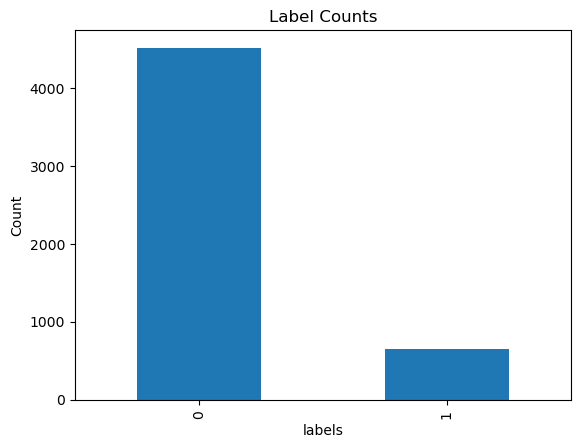

In [ ]:
df['labels'].value_counts().plot.bar()
plt.title('Label Counts')
plt.xlabel('labels')
plt.ylabel('Count')

In [ ]:
#Checking the % of the labels we have

print('Percentage of Ham mails = ',round((len(df[df['labels']==0]))/(len(df['labels'])),2)*100,'%')

print('Percentage of Spam mails = ',round((len(df[df['labels']==1]))/(len(df['labels'])),2)*100,'%')

Percentage of Ham mails =  87.0 %
Percentage of Spam mails =  13.0 %


**From the above checks we can clearly see that the dataset is imbalanced**

In [ ]:
# Replacing special characters and figures with their generic words

# Replace email addresses with 'email'
df['messages'] = df['messages'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replace URLs with 'webaddress'
df['messages'] = df['messages'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replace currency symbols with 'moneysymb' (£ can by typed with ALT key + 156)
df['messages'] = df['messages'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
df['messages'] = df['messages'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
   
# Replace numeric characters with 'numbr'
df['messages'] = df['messages'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [ ]:
# Remove punctuation
df['messages'] = df['messages'].str.replace(r'[^\w\d\s]', ' ')

In [ ]:
df.head()

,labels,messages,character_count,word_count,sentence_count
0,0,go until jurong point crazy available only ...,111,24,1
1,0,ok lar joking wif u oni,29,8,1
2,1,free entry in numbr a wkly comp to win fa cup ...,155,36,1
3,0,u dun say so early hor u c already then say,49,13,1
4,0,nah i don t think he goes to usf he lives aro...,61,15,1


In [ ]:
df['messages'][4]

'nah i don t think he goes to usf  he lives around here though'

In [ ]:
#Removing the stopwords

import string
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['messages'] = df['messages'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))

In [ ]:
df.head()

,labels,messages,character_count,word_count,sentence_count
0,0,go jurong point crazy available bugis n great ...,111,24,1
1,0,ok lar joking wif oni,29,8,1
2,1,free entry numbr wkly comp win fa cup final tk...,155,36,1
3,0,dun say early hor c already say,49,13,1
4,0,nah think goes usf lives around though,61,15,1


In [ ]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.messages.str.len()
df.head()

,labels,messages,character_count,word_count,sentence_count,clean_length
0,0,go jurong point crazy available bugis n great ...,111,24,1,82
1,0,ok lar joking wif oni,29,8,1,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,36,1,139
3,0,dun say early hor c already say,49,13,1,31
4,0,nah think goes usf lives around though,61,15,1,38


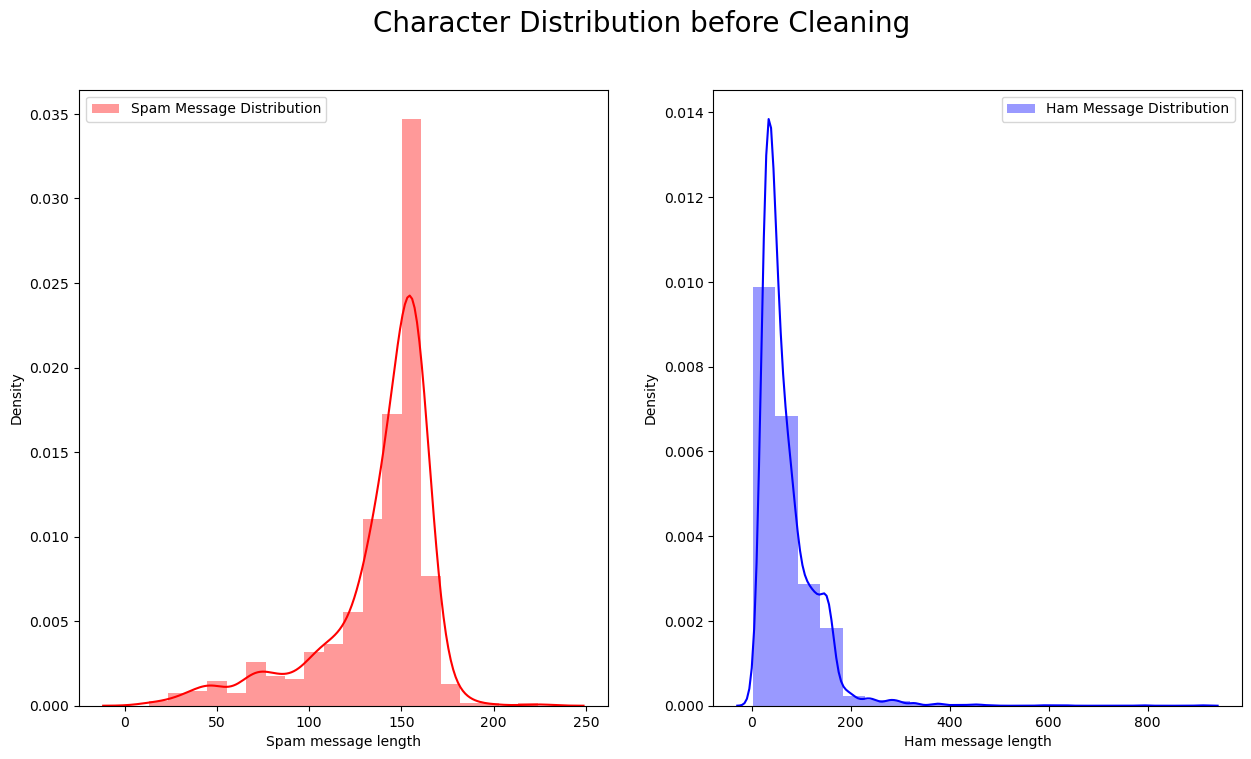

In [ ]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

f.suptitle("Character Distribution before Cleaning", fontsize=20)

sns.distplot(df[df['labels']==1]['character_count'],bins=20, 
             ax=ax[0],label='Spam Message Distribution',color='r')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['labels']==0]['character_count'],bins=20, 
             ax=ax[1],label='Ham Message Distribution',color='b')
ax[1].set_xlabel('Ham message length')
ax[1].legend()

plt.show()

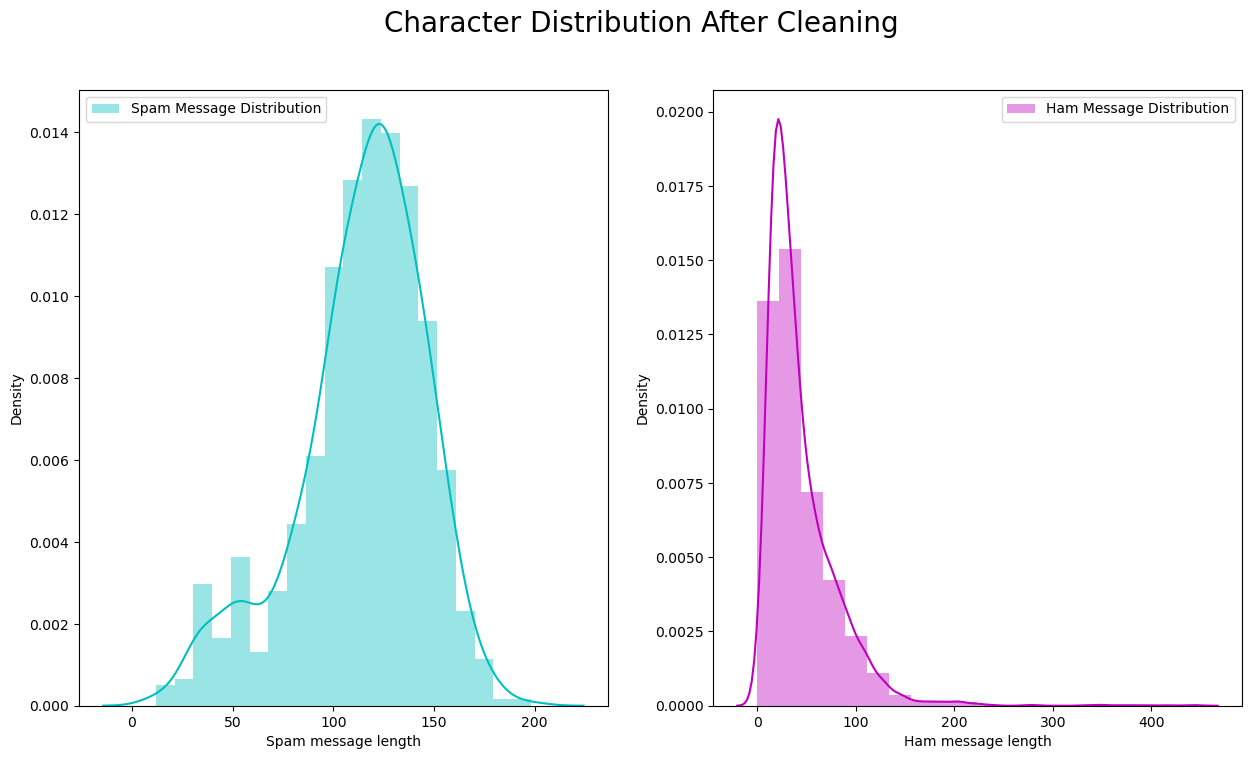

In [ ]:
#Message distribution before cleaning
f,ax = plt.subplots(1,2,figsize=(15,8))

f.suptitle("Character Distribution After Cleaning", fontsize=20)

sns.distplot(df[df['labels']==1]['clean_length'],bins=20, 
             ax=ax[0],label='Spam Message Distribution',color='c')
ax[0].set_xlabel('Spam message length')
ax[0].legend()

sns.distplot(df[df['labels']==0]['clean_length'],bins=20, 
             ax=ax[1],label='Ham Message Distribution',color='m')
ax[1].set_xlabel('Ham message length')
ax[1].legend()

plt.show()

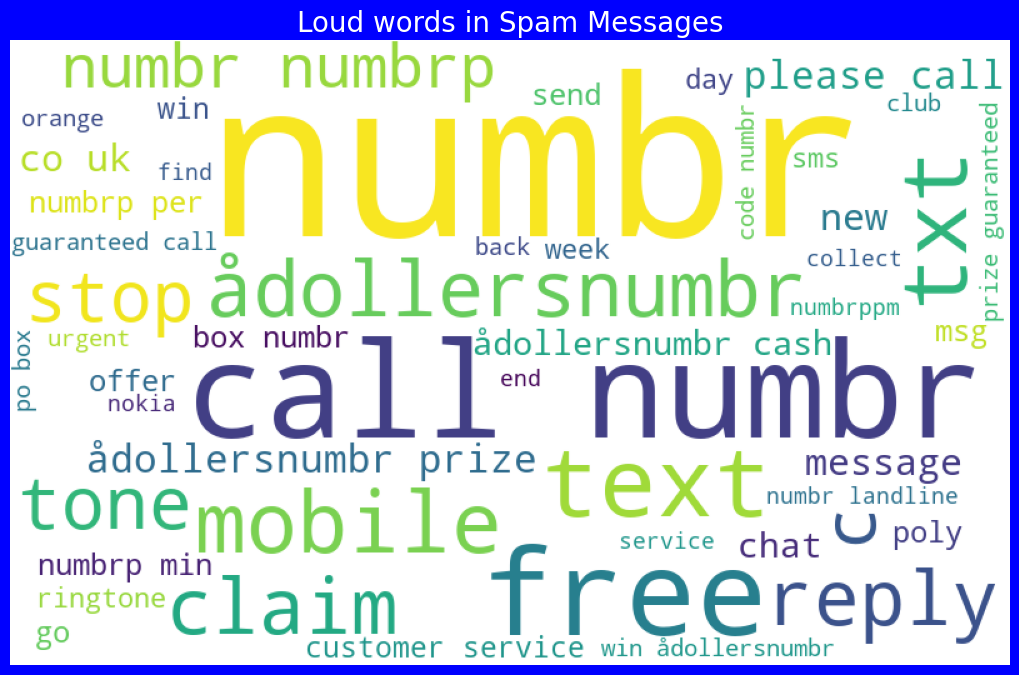

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


spams = df['messages'][df['labels']==1]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.title('Loud words in Spam Messages', fontsize=20, color='w')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

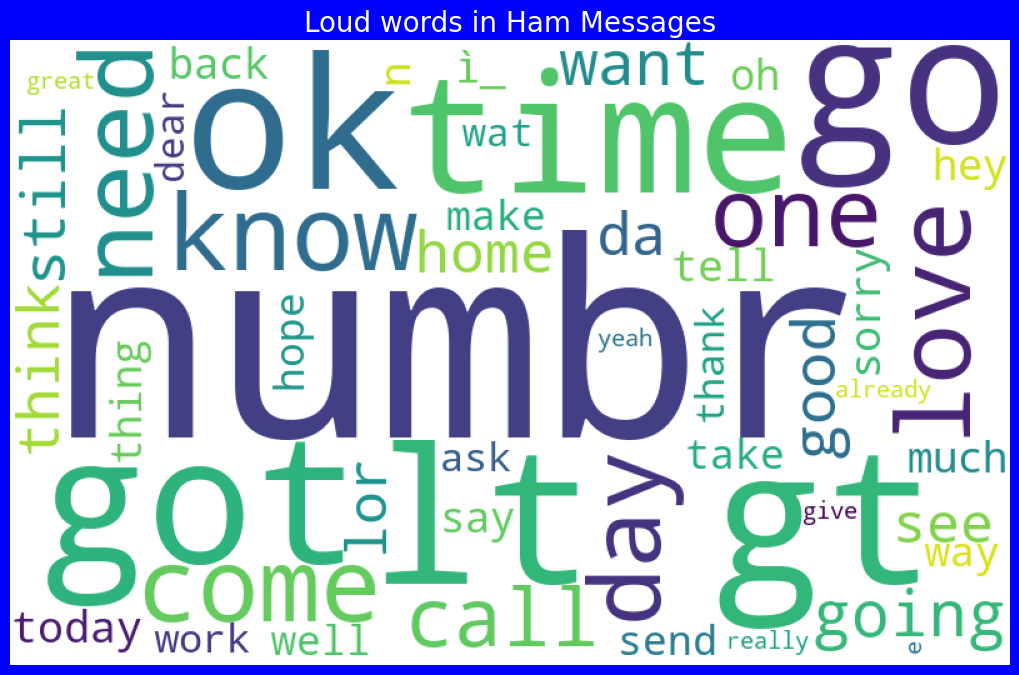

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud

spams = df['messages'][df['labels']==0]

spam_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='b')
plt.imshow(spam_cloud)
plt.title('Loud words in Ham Messages', fontsize=20, color='w')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

**From the visualizations above, it is seen that spam messages throw around a lot of numbers and currency statements and transactional words.**

## Feature Extraction & Train-Test-Split

Feature extraction is converting text to vector(numerical values), that our model(s) will be able to work with. We do this using the TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vec = TfidfVectorizer()

In [ ]:
# Fit messages into the vectorizer for transformation

features = tf_vec.fit_transform(df['messages'])

feature_x = features.toarray()

In [ ]:
feature_x.shape

(5169, 7844)

In [ ]:
df['messages'][3]

'dun say early hor c already say'

In [ ]:
market = tf_vec.transform(['dun say early hor c already say'])

market.shape

(1, 7844)

In [ ]:
# Train_test_split

X = feature_x
y = df['labels']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<AxesSubplot:>

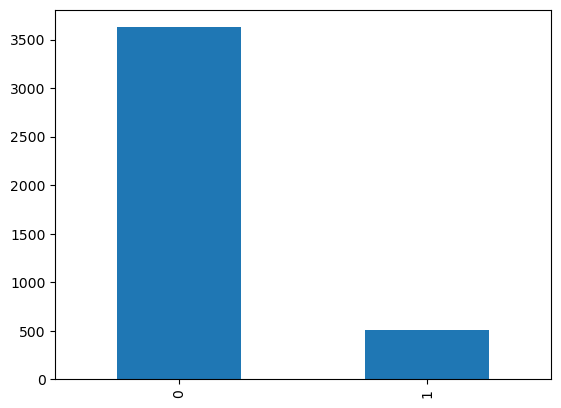

In [ ]:
y_train.value_counts().plot.bar()

In [ ]:
y_train.value_counts()

0    3627
1     508
Name: labels, dtype: int64

In [ ]:
y_test.value_counts()

0    889
1    145
Name: labels, dtype: int64

## Model Building

We will be trying the following models and see which one performs best:
- Logistic Regression
- Support Vector Machines(SVM)
- Multinomial Naive Bayes(MNB)

### - Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [ ]:
# Train the log_reg model with the train data

log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions off the x_test data

log_reg_pred = log_reg.predict(X_test)

In [ ]:
log_reg_pred

array([0, 0, 0, ..., 1, 0, 0])

### Evaluating the log_reg model

Get the Accuracy, confusion matrix and f1_score

In [ ]:
#Accuracy for Logistics Regression

from sklearn.metrics import accuracy_score

log_reg_acc = accuracy_score(y_test, log_reg_pred)

print('Accuracy for Logistics Regression:',round(log_reg_acc*100, 2),'%')

Accuracy for Logistics Regression: 95.65 %


In [ ]:
# Confusion matrix for Logistics Regression

from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report 

print(confusion_matrix(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

[[882   7]
 [ 38 107]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       889
           1       0.94      0.74      0.83       145

    accuracy                           0.96      1034
   macro avg       0.95      0.87      0.90      1034
weighted avg       0.96      0.96      0.95      1034



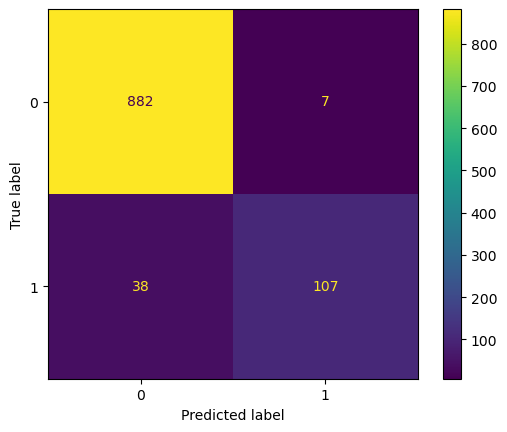

In [ ]:
# The confusion matrix visualization for Logistics Regression

plot_confusion_matrix(log_reg, X_test, y_test)

plt.show()

In [ ]:
# F1_Score for Logistics Regression

from sklearn.metrics import f1_score

log_reg_f1 = f1_score(y_test, log_reg_pred)

print('F1_Score for Logistics Regression:',round(log_reg_f1*100,2),'%')

F1_Score for Logistics Regression: 82.63 %


## - The Support Vector Machines(SVM) Model

In [ ]:
from sklearn.svm import SVC

SVM = SVC(C=1.0, kernel='linear', degree=3 , gamma='auto')

In [ ]:
# Train the SVM model with the train data

SVM.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [ ]:
# Make predictions off the x_test data

SVM_pred = SVM.predict(X_test)

In [ ]:
SVM_pred

array([0, 0, 0, ..., 1, 0, 0])

### Evaluating the SVM model

Get the Accuracy, confusion matrix and f1_score

In [ ]:
SVM_acc = accuracy_score(y_test, SVM_pred)

print('Accuracy for SVM:',round(SVM_acc*100, 2),'%')

Accuracy for SVM: 97.58 %


In [ ]:
# Confusion matrix for SVM

print(confusion_matrix(y_test, SVM_pred))
print(classification_report(y_test, SVM_pred))

[[882   7]
 [ 18 127]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       889
           1       0.95      0.88      0.91       145

    accuracy                           0.98      1034
   macro avg       0.96      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



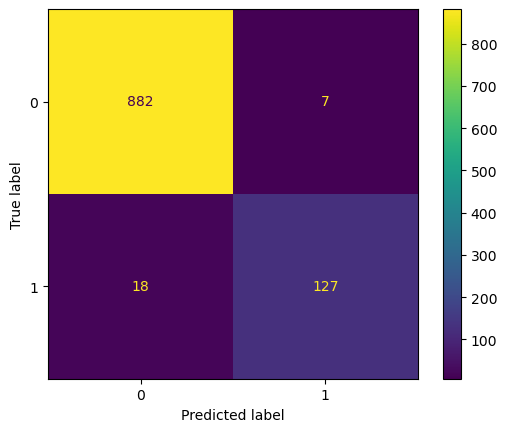

In [ ]:
# The confusion matrix visualization for SVM

plot_confusion_matrix(SVM, X_test, y_test)

plt.show()

In [ ]:
# F1_Score for SVM

SVM_f1 = f1_score(y_test, SVM_pred)

print('F1_Score for SVM:',round(SVM_f1*100,2),'%')

F1_Score for SVM: 91.04 %


## - Multinomial Naive Bayes (MNB) Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

naive = MultinomialNB()

In [ ]:
# Train the MNB model with the train data

naive.fit(X_train, y_train)

MultinomialNB()

In [ ]:
# Make predictions off the x_test data

naive_pred = naive.predict(X_test)

In [ ]:
naive_pred

array([0, 0, 0, ..., 1, 0, 0])

### Evaluating the MNB model

Get the Accuracy, confusion matrix and f1_score

In [ ]:
naive_acc = accuracy_score(y_test, naive_pred)

print('Accuracy for MNB:',round(naive_acc*100, 2),'%')

Accuracy for MNB: 97.1 %


In [ ]:
# Confusion matrix for MNB

print(confusion_matrix(y_test, naive_pred))
print(classification_report(y_test, naive_pred))

[[889   0]
 [ 30 115]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       889
           1       1.00      0.79      0.88       145

    accuracy                           0.97      1034
   macro avg       0.98      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



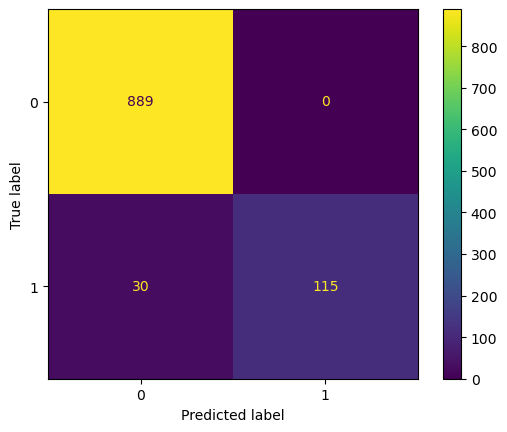

In [ ]:
# The confusion matrix visualization for MNB

plot_confusion_matrix(naive, X_test, y_test)

plt.show()

In [ ]:
# F1_Score for SVM

naive_f1 = f1_score(y_test, naive_pred)

print('F1_Score for MNB:',round(naive_f1*100,2),'%')

F1_Score for MNB: 88.46 %


In [ ]:
# Creating a table for the metrics

d_metrics = {'Model':['log_reg','SVM','MNB'],
            'Accuracy':[96,98,97],
            'F1-Score':[83,91,88]}

df_metrics = pd.DataFrame(d_metrics)

In [ ]:
df_metrics

,Model,Accuracy,F1-Score
0,log_reg,96,83
1,SVM,98,91
2,MNB,97,88


In [ ]:
df_metrics.set_index('Model', inplace=True)
df_metrics

,Accuracy,F1-Score
Model,,
log_reg,96,83
SVM,98,91
MNB,97,88


## Conclusion

From the metrics gathered from all three models used, we can see that they all performed well when it comes to Accuracy and that may be due to the fact that the dataset is imbalanced (frequency of one outcome case is way above the other), however, SVM is best at Accuracy.

The F1-Score metric is very essential in this case because of the effect of the imbalanced dataset on the Accuracy metric. Looking into the F1-Score, we can see that the SVM outperforms the rest.

**Hence, the best model for this problem of the three models is the Support Vector Machines(SVM) Model.** 

In [ ]:
# Create a pickle file

import pickle

In [ ]:
pickle.dump(SVM, open('SVM_model.pkl', 'wb'))

In [ ]:
df.to_csv('cleaned_df.csv')